In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

heart_df = pd.read_csv('heart-disease-dataset/heart.csv')

dataset = pd.get_dummies(heart_df, columns=['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

X = dataset.drop(columns=['target'])  
y = dataset['target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(8, activation='relu'),  
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')




C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5830 - loss: 0.6824 - val_accuracy: 0.6951 - val_loss: 0.5741
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7915 - loss: 0.5196 - val_accuracy: 0.7744 - val_loss: 0.5055
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8456 - loss: 0.4182 - val_accuracy: 0.8049 - val_loss: 0.4634
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8873 - loss: 0.3340 - val_accuracy: 0.8049 - val_loss: 0.4406
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8602 - loss: 0.3291 - val_accuracy: 0.8110 - val_loss: 0.4216
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8587 - loss: 0.3218 - val_accuracy: 0.8110 - val_loss: 0.4086
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8697 - loss: 0.2961 - val_accuracy: 0.8171 - val_loss: 0.4001
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8532 - loss: 0.3266 - val_accuracy: 0.8049 - 

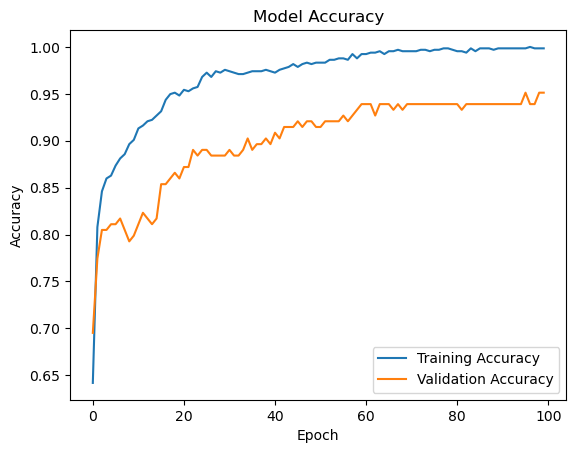

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()